In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
cv2.startWindowThread()
cv2.namedWindow("Image window",cv2.WINDOW_NORMAL) # cv2.WINDOW_NORMAL lets us resize the window

In [73]:
def generate_card(shape_num, shape_color = (0,0,255), 
                   shape_pattern = [[0,0],[0,1]], shape_scale = 1):
    '''
    shape_num: 0 (circle), 1 (rectangle), 2 (triangle) and 3 (cross).
    shape_color: (B,G,R)
    shape_pattern: [[0/1,0/1],[0/1,0/1]]
    '''
    x_dim,y_dim = 200,200
    shape = numpy.ones((x_dim,y_dim,3))
    cv2.rectangle(shape,(x_dim-2,y_dim-2),(1,1),(0,0,0),2)

    radius = int(10*shape_scale)
    thickness = int(2*shape_scale) # must be even


    color = shape_color
    pos_x,pos_y = 100,100
    pos_offsets = [(int(-x_dim/4),int(-y_dim/4)),
                   (int(+x_dim/4),int(-y_dim/4)),
                   (int(+x_dim/4),int(+y_dim/4)),
                   (int(-x_dim/4),int(+y_dim/4))]
    
    for i,pos in enumerate([si for sj in shape_pattern for si in sj]):
        if pos:
            _pos_x = pos_x + pos_offsets[i][0]
            _pos_y = pos_y + pos_offsets[i][1]

            pts_t = numpy.array([[[_pos_x-radius,_pos_y+radius],
                                  [_pos_x+radius,_pos_y+radius],
                                  [_pos_x,_pos_y-radius],
                                  [_pos_x-radius,_pos_y+radius]]], dtype=numpy.int32)

            pts_c = numpy.array([[[_pos_x-thickness/2,_pos_y-radius],
                                  [_pos_x+thickness/2,_pos_y-radius],
                                  [_pos_x+thickness/2,_pos_y-thickness/2],
                                  [_pos_x+radius,_pos_y-thickness/2],
                                  [_pos_x+radius,_pos_y+thickness/2],
                                  [_pos_x+thickness/2,_pos_y+thickness/2],
                                  [_pos_x+thickness/2,_pos_y+radius],
                                  [_pos_x-thickness/2,_pos_y+radius],
                                  [_pos_x-thickness/2,_pos_y+thickness/2],
                                  [_pos_x-radius,_pos_y+thickness/2],
                                  [_pos_x-radius,_pos_y-thickness/2],
                                  [_pos_x-thickness/2,_pos_y-thickness/2]
                                 ]], dtype=numpy.int32)

            shape_args = [((_pos_x,_pos_y), radius, color, -1),
                          ((_pos_x-radius,_pos_y-radius),(_pos_x+radius,_pos_y+radius),color,-1),
                          (pts_t, color),
                          (pts_c, color)]

            shape_methods = [cv2.circle,cv2.rectangle,cv2.fillPoly,cv2.fillPoly]

            shape_methods[shape_num](shape,*shape_args[shape_num])
    
    return shape

In [79]:
while True:
    
    cv2.imshow("Image window", generate_card(3,shape_color = (0,255,255), shape_pattern = [[1,0],[1,1]], shape_scale = 2))
    key = cv2.waitKey(1) & 0xFF
    
    # if the 'q' key is pressed, stop the loop
    if key == ord("q"):
        break

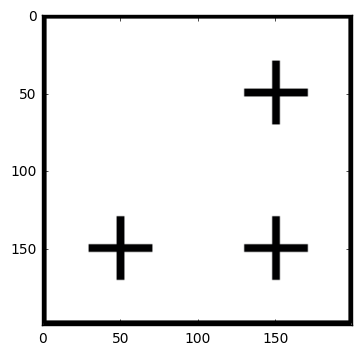

In [75]:
%matplotlib inline

plt.imshow(generate_card(3, shape_pattern = [[0,1],[1,1]], shape_scale = 2))
plt.show()

In [76]:
shape_patterns = []
for i in range(1,5):
    z = numpy.zeros(4,int)
    z[0:i]=1
    shape_patterns.append(z.reshape((2,2)).tolist())

In [77]:
shape_patterns

[[[1, 0], [0, 0]], [[1, 1], [0, 0]], [[1, 1], [1, 0]], [[1, 1], [1, 1]]]

In [ ]:
color0 = (0,0,255)
color1 = (0,255,0)
color2 = (255,0,0)
color3 = (0,0,0)
shape_colors = [color0, color1, color2, color3]

In [41]:
l = [0,1,2,3]
deck = []
for i in l:
    for j in l:
        for k in l:
                deck.append([i,j,k])

In [42]:
new_deck = numpy.copy(deck)
numpy.random.shuffle(new_deck)
cards = new_deck[:4]

In [43]:
cards

array([[2, 3, 2],
       [0, 1, 0],
       [0, 1, 3],
       [3, 1, 1]])

In [100]:
def generate_hand():
    c = [0,1,2,3]
    s = [0,1,2,3]
    n = [0,1,2,3]

    numpy.random.shuffle(c)
    numpy.random.shuffle(s)
    numpy.random.shuffle(n)
    cards = []
    for i in range(4):
        cards.append([c[i],s[i],n[i]])

    return numpy.array(cards)

In [101]:
def unique_card(hand):
    unique = False
    while not unique:
        rnd_card = numpy.random.randint(0, high=4, size=3, dtype='i')
        if (hand-rnd_card).sum(axis=1).prod():
            unique = True
    return rnd_card

In [102]:
hand = generate_hand()

In [103]:
unique_card(hand)

array([3, 1, 2], dtype=int32)